In [1]:
#importing libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
from itertools import cycle
import imblearn
import seaborn as sns

In [2]:
#importing dataset

dataset = pd.read_csv("C:/ML_Project/Datasets/FullDataSet.csv")

In [3]:
#view first 5 data

dataset.head()

,AvgAmount,MaxAmount,AvgCount,MaxCount,AccountType,ProductName,BranchId,RiskLevel,DepositTotal,WTotal,Amount,CategoryName,TransactionType,ScrCustomerType,LengthOfRelation,IsAlerted,IsReported
0,14203,32543,65,192,Savings,EBL Junior,89,Low,160000.0,140000.0,20000,AC2,D,Individual,67.0,1,1
1,14203,32543,65,192,Savings,EBL Junior,89,Low,160000.0,140000.0,15,AC2,D,Individual,67.0,1,1
2,14203,32543,65,192,Savings,EBL Junior,89,Low,160000.0,140000.0,15,AC2,D,Individual,67.0,1,1
3,14203,32543,65,192,Savings,EBL Junior,89,Low,160000.0,140000.0,20000,AC2,D,Individual,67.0,1,1
4,14203,32543,65,192,Savings,EBL Junior,89,Low,160000.0,140000.0,15,AC2,D,Individual,67.0,1,1


In [4]:
#info about dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 17 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   AvgAmount         1048575 non-null  int64  
 1   MaxAmount         1048575 non-null  int64  
 2   AvgCount          1048575 non-null  int64  
 3   MaxCount          1048575 non-null  int64  
 4   AccountType       1014108 non-null  object 
 5   ProductName       1048575 non-null  object 
 6   BranchId          1048575 non-null  int64  
 7   RiskLevel         1048575 non-null  object 
 8   DepositTotal      1048575 non-null  float64
 9   WTotal            1048575 non-null  float64
 10  Amount            1048575 non-null  int64  
 11  CategoryName      1048575 non-null  object 
 12  TransactionType   1048575 non-null  object 
 13  ScrCustomerType   1048575 non-null  object 
 14  LengthOfRelation  1048563 non-null  float64
 15  IsAlerted         1048575 non-null  int64  
 16  

In [5]:
#shape of dataset

dataset.shape

(1048575, 17)

In [6]:
#target column value count

dataset['IsReported'].value_counts()

0    1047938
1        637
Name: IsReported, dtype: int64

In [7]:
#applying label encoding

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
# from sklearn.compose import ColumnTransformer
dataset['AccountType']= label_encoder.fit_transform(dataset['AccountType'])
dataset['ProductName']= label_encoder.fit_transform(dataset['ProductName'])
dataset['RiskLevel']= label_encoder.fit_transform(dataset['RiskLevel'])
dataset['CategoryName']= label_encoder.fit_transform(dataset['CategoryName'])
dataset['TransactionType']= label_encoder.fit_transform(dataset['TransactionType'])
dataset['ScrCustomerType']= label_encoder.fit_transform(dataset['ScrCustomerType'])

In [8]:
# #applying onehot encoding

# onehotencoder = preprocessing.OneHotEncoder()
# x = onehotencoder.fit_transform(x).toarray()

In [9]:
dataset

,AvgAmount,MaxAmount,AvgCount,MaxCount,AccountType,ProductName,BranchId,RiskLevel,DepositTotal,WTotal,Amount,CategoryName,TransactionType,ScrCustomerType,LengthOfRelation,IsAlerted,IsReported
0,14203,32543,65,192,7,32,89,2,160000.0,140000.0,20000,4,1,1,67.0,1,1
1,14203,32543,65,192,7,32,89,2,160000.0,140000.0,15,4,1,1,67.0,1,1
2,14203,32543,65,192,7,32,89,2,160000.0,140000.0,15,4,1,1,67.0,1,1
3,14203,32543,65,192,7,32,89,2,160000.0,140000.0,20000,4,1,1,67.0,1,1
4,14203,32543,65,192,7,32,89,2,160000.0,140000.0,15,4,1,1,67.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,21197,114293,5,15,7,34,49,2,80000.0,70000.0,2400,71,1,1,75.0,0,0
1048571,2479,4424,6,16,7,51,53,2,21000.0,19000.0,2423,45,0,1,24.0,0,0
1048572,480,500,1,2,1,11,31,2,0.0,0.0,500,173,0,1,140.0,0,0
1048573,51864,547889,4,12,7,42,16,2,100000.0,80000.0,10000,71,1,1,152.0,0,0


In [10]:
#checking for negative value

(dataset['AvgAmount'] < 0).sum()

17

In [11]:
(dataset['Amount'] < 0).sum()

3846

In [12]:
#drop rows containing negative values

indexName1 = dataset[ (dataset['AvgAmount'] <0) ].index          #avgamount
dataset.drop(indexName1 , inplace=True)

indexName2 = dataset[ (dataset['Amount'] <0) ].index             #amount
dataset.drop(indexName2 , inplace=True)

In [13]:
(dataset < 0).sum().sum()

0

In [14]:
dataset.shape

(1044712, 17)

In [15]:
#count rows which values are less than 1000

dataset[dataset['Amount'] < 1000].count().sum()

5489963

In [16]:
#eliminate rows which values are less than 1000

dataset.drop(dataset[dataset['Amount'] < 1000].index, inplace=True)

In [17]:
dataset[dataset['Amount'] < 1000].count().sum()

0

In [18]:
dataset.shape

(721773, 17)

In [19]:
#checking null values

dataset.isnull().sum()

AvgAmount            0
MaxAmount            0
AvgCount             0
MaxCount             0
AccountType          0
ProductName          0
BranchId             0
RiskLevel            0
DepositTotal         0
WTotal               0
Amount               0
CategoryName         0
TransactionType      0
ScrCustomerType      0
LengthOfRelation    12
IsAlerted            0
IsReported           0
dtype: int64

In [20]:
#eleminating row wise 'null values'

dataset = dataset.dropna()

In [21]:
#checking null values

dataset.isnull().sum().sum()

0

In [22]:
dataset.shape

(721761, 17)

In [23]:
#selecting features and target

x = dataset.iloc[:,:-1]
y = dataset.iloc[:,16]

In [24]:
y.value_counts()

0    721265
1       496
Name: IsReported, dtype: int64

<AxesSubplot: xlabel='IsReported', ylabel='count'>

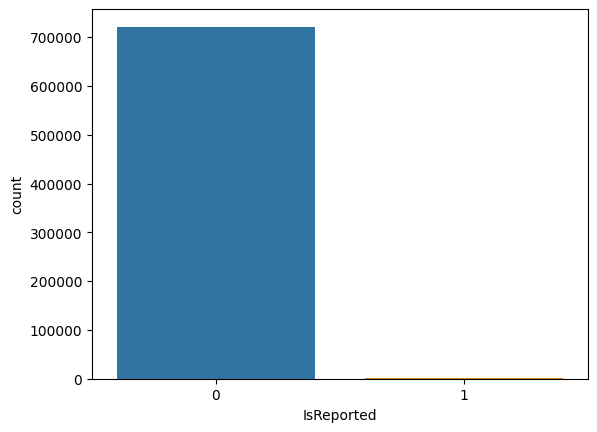

In [25]:
sns.countplot(x=y)

In [26]:
x = x.values
y= y.values

In [27]:
#test-train split

from sklearn.model_selection import train_test_split, cross_val_score
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [28]:
#Random oversampling 

from imblearn.over_sampling import RandomOverSampler
re_smp_ro = RandomOverSampler(random_state = 0)
x_train_ro, y_train_ro = re_smp_ro.fit_resample(x_train, y_train)

<AxesSubplot: ylabel='count'>

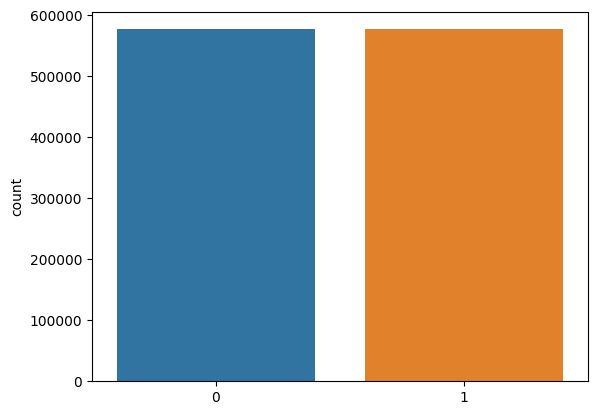

In [29]:
sns.countplot(x=y_train_ro)

In [30]:
#scalling

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)   #without sampling
# x_train_ro = sc_x.fit_transform(x_train_ro) #with sampling
x_test = sc_x.transform(x_test)

In [31]:
#applying ANN model

from keras.models import Sequential
from keras.layers import Dense

#initial ann

classifier = Sequential()

#adding input & hiddenlayer

classifier.add(Dense(units = 11, activation = 'relu', input_dim = 16))

#addin 2nd hidden layer

classifier.add(Dense(units =11, activation = 'relu'))

#addin 3rd hidden layer

classifier.add(Dense(units =11, activation = 'relu'))

#output layer

classifier.add(Dense(units = 1, activation = 'sigmoid'))

#compile ann

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [32]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                187       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 11)                132       
                                                                 
 dense_3 (Dense)             (None, 1)                 12        
                                                                 
Total params: 463
Trainable params: 463
Non-trainable params: 0
_________________________________________________________________


In [33]:
#fit to train set

classifier.fit(x_train, y_train, batch_size = 500, epochs = 10)    #without sampling
# classifier.fit(x_train_ro, y_train_ro, batch_size = 500, epochs = 10)  #with sampling
y_pred = classifier.predict(x_test)

Epoch 1/10
1155/1155 [==============================] - 3s 2ms/step - loss: 0.0616 - accuracy: 0.9804
Epoch 2/10
1155/1155 [==============================] - 2s 2ms/step - loss: 0.0037 - accuracy: 0.9993
Epoch 3/10
1155/1155 [==============================] - 2s 2ms/step - loss: 0.0034 - accuracy: 0.9993
Epoch 4/10
1155/1155 [==============================] - 2s 2ms/step - loss: 0.0032 - accuracy: 0.9993
Epoch 5/10
1155/1155 [==============================] - 2s 2ms/step - loss: 0.0030 - accuracy: 0.9993
Epoch 6/10
1155/1155 [==============================] - 2s 2ms/step - loss: 0.0029 - accuracy: 0.9993
Epoch 7/10
1155/1155 [==============================] - 2s 2ms/step - loss: 0.0028 - accuracy: 0.9993
Epoch 8/10
1155/1155 [==============================] - 2s 2ms/step - loss: 0.0027 - accuracy: 0.9994
Epoch 9/10
1155/1155 [==============================] - 2s 2ms/step - loss: 0.0027 - accuracy: 0.9994
Epoch 10/10
4512/4512 [==============================] - 6s 1ms/step


In [34]:
#confusion matrix

from sklearn.metrics import classification_report, confusion_matrix
cm=confusion_matrix(y_test,np.argmax(y_pred, axis = 1))
cr=classification_report(y_test,np.argmax(y_pred, axis = 1))

C:\ML_Project\AML_ML\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ML_Project\AML_ML\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ML_Project\AML_ML\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[144242      0]
 [   111      0]]


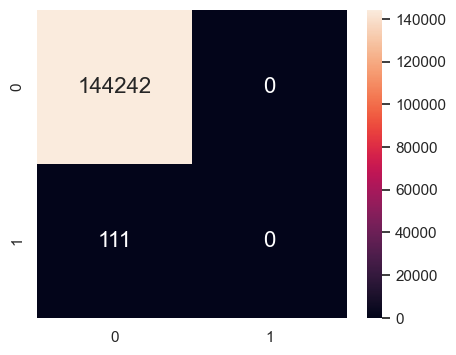

In [35]:
print(cm)

plt.figure(figsize = (5,4))
sns.set(font_scale=1) # for label size
sns.heatmap(cm, annot=True, fmt='g', annot_kws={"size": 16}) # font size

plt.show()

In [36]:
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    144242
           1       0.00      0.00      0.00       111

    accuracy                           1.00    144353
   macro avg       0.50      0.50      0.50    144353
weighted avg       1.00      1.00      1.00    144353



In [37]:
#AUC score

from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.994588611156601

In [38]:
#ROC curve initiate

from sklearn.metrics import roc_curve
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred)

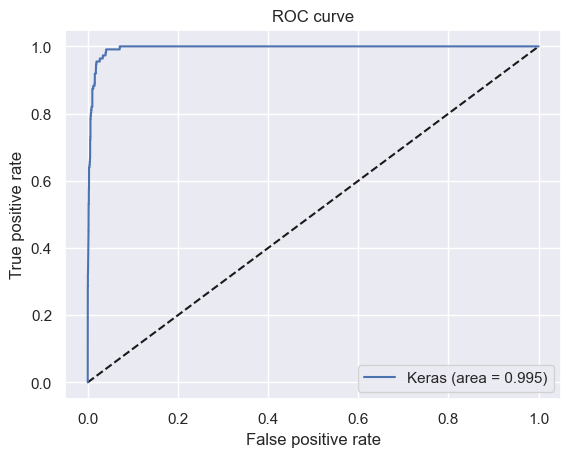

In [39]:
#plotting ROC curve

from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [40]:
# plt.figure(figsize=(10, 8))
# plt.plot(history.classifier['acc'])
# plt.plot(history.classifier['val_acc'])

# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train','validation'], loc = 'upper left')
# plt.savefig('model_Accuracy.png')
# plt.show()

In [41]:
# plt.figure(figsize=(10, 8))
# plt.plot(history.classifier['loss'])
# plt.plot(history.classifier['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train','validation'], loc = 'upper left')
# plt.savefig('model_loss.png')
# plt.show()

In [ ]:
#............................................................................................................................#

In [ ]:
#testing

In [42]:
test_data = pd.read_csv("C:/ML_Project/Datasets/test.csv")

In [43]:
test_data

,AvgAmount,MaxAmount,AvgCount,MaxCount,AccountType,ProductName,BranchId,RiskLevel,DepositTotal,WTotal,Amount,CategoryName,TransactionType,ScrCustomerType,LengthOfRelation,IsAlerted
0,54118,212503,38,107,Savings,EBL Power Savings,73,Low,170000,140000,265000,CHD,C,Individual,85,1
1,11414,22099,3,11,Savings,EBL SALARY,31,Low,35000,33000,20250,FTR,C,Individual,40,0


In [48]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
# from sklearn.compose import ColumnTransformer
test_data['AccountType']= label_encoder.fit_transform(test_data['AccountType'])
test_data['ProductName']= label_encoder.fit_transform(test_data['ProductName'])
test_data['RiskLevel']= label_encoder.fit_transform(test_data['RiskLevel'])
test_data['CategoryName']= label_encoder.fit_transform(test_data['CategoryName'])
test_data['TransactionType']= label_encoder.fit_transform(test_data['TransactionType'])
test_data['ScrCustomerType']= label_encoder.fit_transform(test_data['ScrCustomerType'])

In [49]:
test_data

,AvgAmount,MaxAmount,AvgCount,MaxCount,AccountType,ProductName,BranchId,RiskLevel,DepositTotal,WTotal,Amount,CategoryName,TransactionType,ScrCustomerType,LengthOfRelation,IsAlerted
0,54118,212503,38,107,0,0,73,0,170000,140000,265000,0,0,0,85,1
1,11414,22099,3,11,0,1,31,0,35000,33000,20250,1,0,0,40,0


In [50]:
test_data.values

array([[ 54118, 212503,     38,    107,      0,      0,     73,      0,
        170000, 140000, 265000,      0,      0,      0,     85,      1],
       [ 11414,  22099,      3,     11,      0,      1,     31,      0,
         35000,  33000,  20250,      1,      0,      0,     40,      0]],
      dtype=int64)

In [51]:
y_pred_test = classifier.predict(test_data)

1/1 [==============================] - 0s 77ms/step


In [52]:
y_pred_test

array([[0.],
       [0.]], dtype=float32)